## Lagragien for Static Balance

*Source : Dynamics and Control of np.single-Line Kites - Gonzalo Sanchez-Arrlaga*

*Goal : Find the Angle of Attack ($\alpha = \theta$) and the Elevation($\Gamma$) in Regard of Wind Speed and Airfoil Polar*


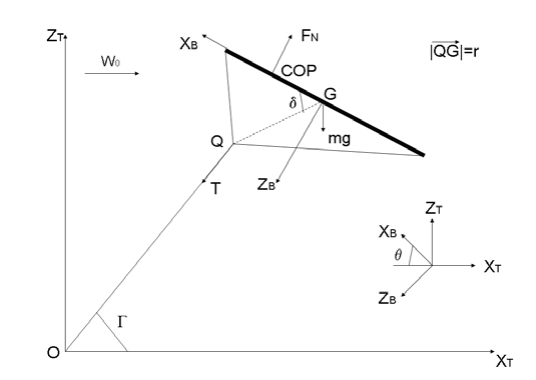

## Import

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [41]:
# # %% Xfoil Polar 
# polar_data = pd.read_csv(os.path.join(os.getcwd(),"polar_SK50VD.csv")) # Same airfoil as 10VB
polar_data = pd.read_csv(filepath_or_buffer='polar_SK50VD.csv') # Same airfoil as 10VB
polar = {
    "alpha" : polar_data.alpha,
    "CL" : polar_data.CL,
    "CD" : polar_data.CD, 
    "CDp" : polar_data.CDp,
    "CM" : polar_data.CM,
    "Top_Xtr" : polar_data.Top_Xtr,
    "Bot_Xtr" : polar_data.Bot_Xtr,
}

# # %% Air
g = 9.8 
rho = 1.225

# # %% Kite
Surface = 10 # (m2)
mass = 5.5 # (kg)
height = 2.2 # distance from towpoint to profile (m)
corde = 1.99 # (m)
Xt = 0.3* corde # towpoint (m)
Xg = 0.5 * corde  # mass center (m)
delta_deg = 83 # Bridle Angle (°)
r = 2.26 # Bridle Length |QG| (m)

# %% Calculs 
polar["Xcop"] = (0.25 - polar["CM"]/polar["CL"])* corde
polar["Xcp"] = Xg-polar["Xcop"]
polar["CN"] = (polar["CL"]**2+ polar["CD"]**2)**0.5

delta = delta_deg*np.pi/180 #atan(height / (Xg-Xt))
polar["sigma"] = polar["Xcp"] / r 

## Main

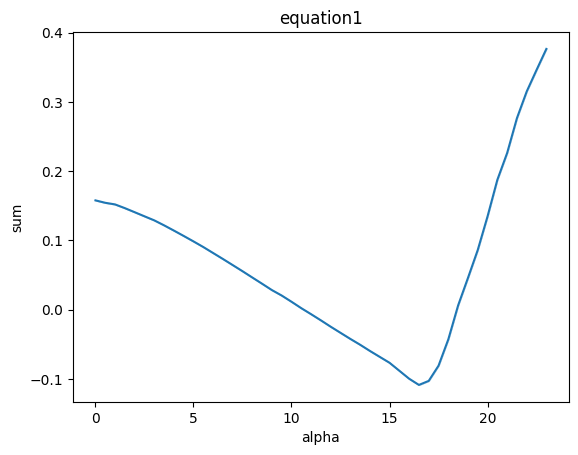

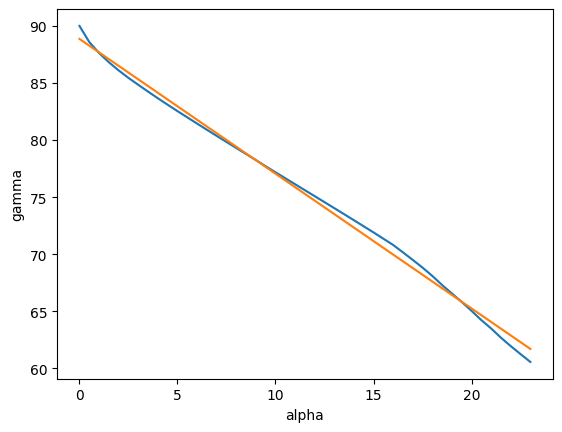

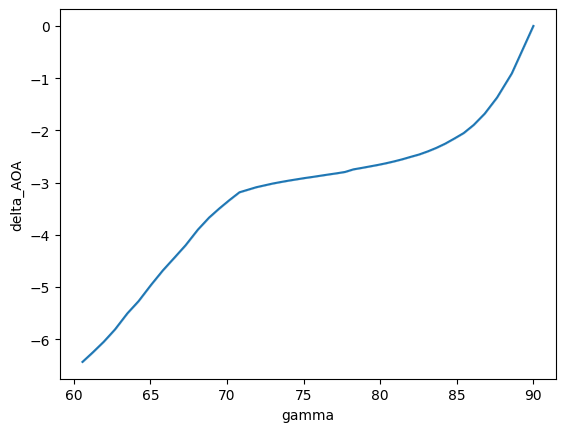

Equation: y = 88.86420091518615 + -1.180622142694161x

R²: 0.9957987194184421



In [49]:
# %% Input
W0 =5 # Wind speed (m/s)

# %% Equation 1 
beta = rho * Surface * W0**2 / (2 * mass * g)

polar["cos1"] = np.cos(delta - polar["alpha"]*np.pi/180)
polar["cos2"] = - beta * (polar["sigma"] - np.cos(delta))* polar["CN"]

polar["sum"] = polar["cos1"] + polar["cos2"]

# %% Alpha
polar_sum = sns.lineplot(data=polar, x="alpha", y="sum")
polar_sum.set_title("equation1")
polar_sum.set_ylabel('sum')
polar_sum.set_xlabel('alpha')
plt.show()

# %% Polar theta
polar["cos"] = np.cos(polar["cos2"])*180/np.pi
polar["theta1"] = delta_deg - polar["cos"]
polar["theta2"] = -(delta_deg + polar["cos"] - 180)
polar["diff1"] = polar["theta1"] - polar["alpha"]
polar["diff2 "]= polar["theta2"] - polar["alpha"]

# %% Equation 2 
polar["gamma"] = np.atan((beta * polar["CN"] *np.cos(polar["alpha"]*np.pi/180)-1) / (beta * polar["CN"] * np.sin(polar["alpha"]*np.pi/180))  ) *180/np.pi

# %% regression de l'élévation en fonction de l'incidence : 
P = np.polyfit(np.array(polar["alpha"]), polar["gamma"], 1)
polar["mdl"] = P[0]*np.array(polar["alpha"]) + P[1]
R = np.corrcoef(np.array(polar["alpha"]), polar["gamma"])

polar_gamma = sns.lineplot(data=polar, x="alpha", y="gamma", legend="full")
polar_mdl = sns.lineplot(data=polar, x="alpha", y="mdl")
# polar_gamma.set_title('regression linéaire')
# polar_gamma.set_ylabel('gamma')
# polar_gamma.set_xlabel('alpha')
# polar_gamma.legend('données', 'ligne de regression')
plt.show()

# %% Plot de theta - (pi/2 - gamma)
polar["delta_AOA"] = polar["alpha"] -(90 - polar["gamma"])
polar_delta_AOA = sns.lineplot(data=polar, x="gamma", y="delta_AOA", legend="full")
plt.show()

# Coefficients du modèle
intercept = P[1]
slope = P[0]

# R²
r_squared = R[0,1]**2

# Afficher les résultats
print(f"Equation: y = {intercept} + {slope}x\n")
print(f"R²: {r_squared}\n")